In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t,binom,ttest_1samp,ttest_ind,norm,ttest_rel
import statsmodels.api as sm
plt.style.use('fivethirtyeight')


In [2]:
obeserved_value = 6.6
comapred_mean = 7
sd_obs = 0.8
N = 15
t_test = (obeserved_value - comapred_mean)/(sd_obs/np.sqrt(N))
t_test
print('P value',t.cdf(t_test,14))

P value 0.03662922171990759


In [3]:
value_to_compare = 0.13
p_value = 1 - binom.cdf(35,200,0.13)
print(p_value)

0.026674944286108837


In [4]:
df_bangladesh = pd.read_csv('Data/Bangladesh.csv')
df_bangladesh.describe()

,Arsenic,Chlorine,Cobalt
count,271.000000,269.000000,270.000000
mean,125.319926,78.084015,0.503778
std,297.975491,210.019193,0.377409
min,0.500000,1.000000,0.050000
25%,6.000000,5.000000,0.282500
50%,22.000000,14.200000,0.410000
75%,109.000000,55.500000,0.630000
max,2400.000000,1550.000000,3.180000


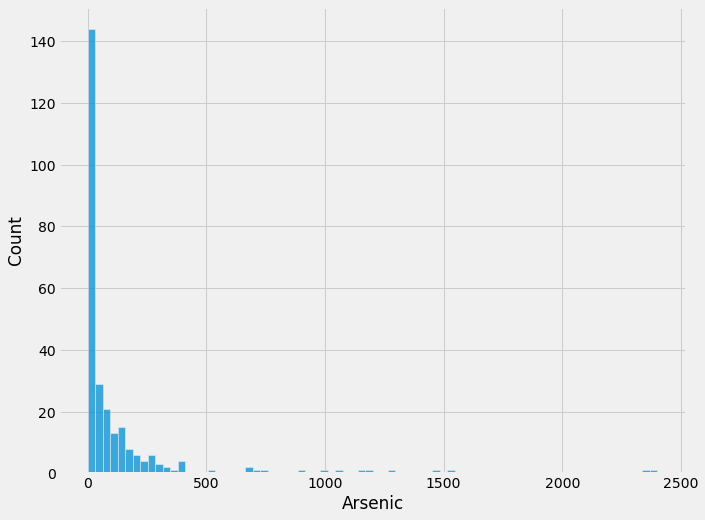

In [5]:
fig,axs = plt.subplots(1,1,figsize = (10,8))
sns.histplot(df_bangladesh.Arsenic,ax=axs)
plt.show()

In [6]:
obeserved_value = df_bangladesh.Arsenic.mean()
comapred_mean = 100
sd_obs = df_bangladesh.Arsenic.std(ddof=1)
N = df_bangladesh.shape[0]
test_stat = (obeserved_value - comapred_mean)/(sd_obs/np.sqrt(N))
print(test_stat)
print('P value',1 - t.cdf(t_test,N-2))

1.3988351492417268
P value 0.9730726021234335


In [7]:
test_stat,p_value = ttest_1samp(df_bangladesh.Arsenic,100,alternative='greater')
print(test_stat,p_value)

1.398835149241725 0.08150503308524212


In [8]:
## bootstarp procedure
N = 999
boot_test_stat = []
for i in range(9999):
    df_temp = df_bangladesh.sample(frac=1,replace=True)
    bootstrap_arsenic_mean = df_temp.Arsenic.mean()
    bootstrap_arsenic_std = df_temp.Arsenic.std()
    sample_t_test_stat = (bootstrap_arsenic_mean - obeserved_value)/(bootstrap_arsenic_std/np.sqrt(271))
    boot_test_stat.append(sample_t_test_stat)
boot_p_value = (np.sum(np.array(boot_test_stat) >= test_stat)+1)/10000
print(boot_p_value)

0.0494


In [9]:
df_temp.shape

(271, 3)

In [10]:
df_nc_data = pd.read_csv('Data/NCBirths2004.csv')
df_nc_data.head()

,ID,MothersAge,Tobacco,Alcohol,Gender,Weight,Gestation,Smoker
0,1,30-34,No,No,Male,3827,40,No
1,2,30-34,No,No,Male,3629,38,No
2,3,35-39,No,No,Female,3062,37,No
3,4,20-24,No,No,Female,3430,39,No
4,5,25-29,No,No,Male,3827,38,No


In [11]:
df_nc_data.groupby(by= 'Smoker').agg(count_babies = ('Smoker','count'),
                                    mean_weight = ('Weight',np.mean),
                                    std_weight = ('Weight',np.std)).reset_index()
x1_bar = 3471.912027
x2_bar = 3256.909910
n1 = 898
n2 = 111
s1 = 478.552407
s2 = 520.478810

test_stat = (x1_bar - x2_bar)/(np.sqrt(s1**2/n1 + s2**2/n2))
print(test_stat)
nu = (s1**2/n1 + s2**2/n2)**2/((s1**2/n1)**2/(n1 -1) + ((s2**2)/n2)**2/(n2-1))
print(nu)

print('P value',1 - t.cdf(test_stat,nu))

4.141132291569932
134.01080029404963
P value 3.039807152183105e-05


In [12]:
smoker_weight = df_nc_data[df_nc_data.Smoker == 'Yes'].Weight
non_smoker_weight = df_nc_data[df_nc_data.Smoker == 'No'].Weight

test_stat,p_value = ttest_ind(non_smoker_weight,smoker_weight,equal_var= False,alternative='greater')

print(test_stat,p_value)

test_stat,p_value = ttest_ind(smoker_weight,non_smoker_weight,equal_var= False,alternative='less')
print(test_stat,p_value)

4.141132287319758 3.0398072027690777e-05
-4.141132287319758 3.0398072027690777e-05


In [22]:
X1 = 550
n1 = 684
X2 = 425
n2 = 563
p_p = (X1+X2)/(n1+n2)
se_p_p = np.sqrt(p_p*(1-p_p)*(1/n1 + 1/n2))
print(se_p_p)
p1 = X1/n1
p2 = X2/n2
test_stat = (p1 - p2)/(se_p_p)
print(test_stat)
p_value = 2*(1- norm.cdf(test_stat))
print(p_value)

0.023500185198538224
2.0939843565680127
0.03626137380534078


In [24]:
count = np.array([550, 425])
nobs = np.array([684, 563])
sm.stats.proportions_ztest(count,nobs)

(2.0939843565680127, 0.036261373805340856)

In [37]:
X1 = 126
n1 = 197
X2 = 223
n2 = 406
count = np.array([X1,X2])
nobs = np.array([n1,n2])
sm.stats.proportions_ztest(count,nobs,alternative='larger')

(2.1070304205416392, 0.017557471380485558)

In [39]:
p1 = X1/n1
p2 = X2/n2
p_p = (X1+X2)/(n1+n2)
se_p_p = np.sqrt(p_p*(1-p_p)*(1/n1 + 1/n2))
print(p_p)
print(se_p_p)
test_stat = (p1 - p2)/(se_p_p)
print(test_stat)
p_value = (1- norm.cdf(test_stat))
print(p_value)

0.5787728026533997
0.04287210284433294
2.1070304205416392
0.01755747138048558


In [43]:
df_diving_Data = pd.read_csv('Data2/Diving2017.csv')
df_diving_Data

,Name,Country,Semifinal,Final
0,CHEONG Jun Hoong,Malaysia,325.50,397.50
1,SI Yajie,China,382.80,396.00
2,REN Qian,China,367.50,391.95
3,KIM Mi Rae,North Korea,346.00,385.55
4,WU Melissa,Australia,318.70,370.20
5,KIM Kuk Hyang,North Korea,360.85,360.00
6,ITAHASHI Minami,Japan,313.70,357.85
7,BENFEITO Meaghan,Canada,355.15,331.40
8,PAMG Pandelela,Malaysia,322.75,322.40
9,CHAMANDY Olivia,Canada,320.55,307.15


In [52]:
semifinal_df = df_diving_Data.Semifinal
final_df = df_diving_Data.Final
ttest_rel(final_df,semifinal_df)

Ttest_relResult(statistic=1.1903390385665338, pvalue=0.25896840383393227)

In [57]:
diff_df = final_df - semifinal_df
x1_bar = np.mean(final_df)
x2_bar = np.mean(semifinal_df)
s1 = np.std(final_df,ddof=1)
s2 = np.std(semifinal_df,ddof=1)
n1 = 11
n2 = 11
test_stat = (x1_bar - x2_bar)/(np.sqrt(s1**2/n1 + s2**2/n2))
print(test_stat)
nu = 11
print(nu)

print('P value',t.cdf(test_stat,nu))


0.8608768765917962
11
P value 0.7961605082326577


In [68]:
A_1 = np.array([30.02, 29.99, 30.11, 29.97, 30.01, 29.99])
A_2 = np.array([29.89, 29.93, 29.72,29.98, 30.02, 29.98])
ttest_rel(A_1,A_2,axis=0)


Ttest_relResult(statistic=1.5099668870541376, pvalue=0.191436884336601)

In [74]:
z_stat = (505 - 515)/(116/np.sqrt(100))
print(z_stat)
norm.cdf(z_stat)

-0.8620689655172414


0.19432478402915743

In [89]:
mu_h0 = 30
n = 30
std_dev = 6
alpha = 0.05
c=norm.ppf(0.05)
x_bar =  30 + 6/(30**0.5) * (-1.645)
print(x_bar)
norm.cdf(x_bar,loc = 27, scale = 6/30**0.5)

28.197992785808005


0.8629375807724328

In [94]:
x_bar = norm.ppf(0.95,loc=0,scale = 3/(20**0.5))

1 - norm.cdf(x_bar,loc = 2,scale = 3/(20**0.5))

0.9093185375111443

In [95]:
norm.ppf(0.99)

2.3263478740408408

In [106]:
q= t.ppf(0.975,49)
4 + q * 3/np.sqrt(50)
4 - q * 3/np.sqrt(50)

3.1474094346328805